In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import random
%matplotlib inline

1 Построить гистограмму и с помощью описательной статистики охарактеризовать рассматриваемый бизнес-процесс. (Текстовое описание в ячейке Marcdown)
Постройте гистограммы распределения цен для каждой категории (по количеству комнат). Какие выводы можно сделать на основе полученных гистограмм? 

In [4]:
data = pd.read_excel('БД_Риэлтор.xlsx')
data.head()

,No,Rooms,DistMetro,Area,Price
0,1,3,12,56,9396
1,2,2,4,54,9785
2,3,1,2,31,5783
3,4,2,8,48,9123
4,5,1,11,31,5662


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   No         5000 non-null   int64
 1   Rooms      5000 non-null   int64
 2   DistMetro  5000 non-null   int64
 3   Area       5000 non-null   int64
 4   Price      5000 non-null   int64
dtypes: int64(5)
memory usage: 195.4 KB


In [6]:
data.mode().head(1)

,No,Rooms,DistMetro,Area,Price
0,1,2.0,16.0,29.0,5432.0


In [7]:
data.describe()

,No,Rooms,DistMetro,Area,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,1.999200,9.588000,47.558800,8550.912200
std,1443.520003,0.813715,5.795151,17.167431,2985.530681
min,1.000000,1.000000,0.000000,21.000000,2825.000000
25%,1250.750000,1.000000,5.000000,31.000000,5904.750000
50%,2500.500000,2.000000,10.000000,48.000000,8407.500000
75%,3750.250000,3.000000,15.000000,59.000000,10652.000000
max,5000.000000,3.000000,19.000000,83.000000,17614.000000


Text(0.5, 0, 'Цена на квартиры')

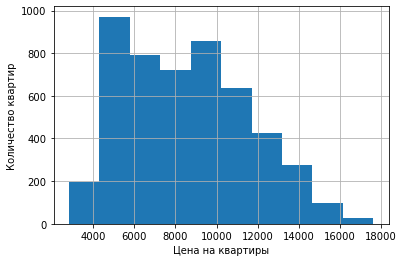

In [8]:
price=data['Price']
hist=price.hist()
hist.set_ylabel('Количество квартир')
hist.set_xlabel('Цена на квартиры')

   Исходя из построенной диаграммы, выдвигается гипотеза о распределении гамма цен на квартиры в базе данных.
   Из описательной статистики получили следующие значения: цена на самую встречающуюся квартиру 5432, минимальная цена 2825, максимальная цена 17614.

In [9]:
rooms=data['Rooms'].unique()

In [10]:
price_room_1=price[data['Rooms']==1]
price_room_2=price[data['Rooms']==2]
price_room_3=price[data['Rooms']==3]

Text(0.5, 0, 'Цена однокомнатной квартиры')

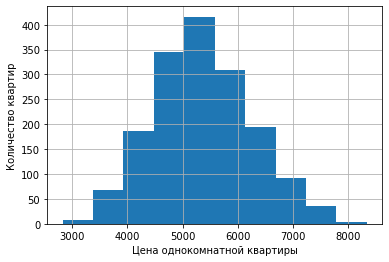

In [11]:
hist1=price_room_1.hist()
hist1.set_ylabel('Количество квартир')
hist1.set_xlabel('Цена однокомнатной квартиры')

Text(0.5, 0, 'Цена двухкомнатной квартиры')

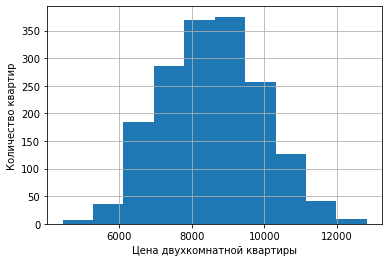

In [12]:
hist2=price_room_2.hist()
hist2.set_ylabel('Количество квартир')
hist2.set_xlabel('Цена двухкомнатной квартиры')

Text(0.5, 0, 'Цена трехкомнатной квартиры')

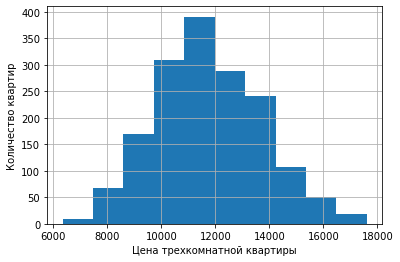

In [13]:
hist3=price_room_3.hist()
hist3.set_ylabel('Количество квартир')
hist3.set_xlabel('Цена трехкомнатной квартиры')

По данным гистограммам можно выдвинуть гипотезу о нормальном распределении цен на квартиры с одинаковым количеством комнат.

2. Используя знакомые вам методы, дайте оценку корреляции цены и площади квартиры отдельно по каждой категории (по количеству комнат). Какие выводы можно сделать из этой оценки?

**Для однокомнатных**

In [14]:
room_1=data[data['Rooms']==1]
room_1[['Price', 'Area']].cov()

,Price,Area
Price,780506.330905,1989.519167
Area,1989.519167,11.899206


In [15]:
correlation_1=1989.519167/(statistics.pstdev(room_1['Price'])*statistics.pstdev(room_1['Area']))
print(correlation_1)
print(correlation_1*100)

0.6532254508775661
65.32254508775661


In [18]:
room_1[['Price', 'Area']].corr().style.set_precision(2)

,Price,Area
Price,1.00,0.65
Area,0.65,1.00


Коэффициент корреляции Пирсона 65%

**Для двухкомнатных**

In [19]:
room_2=data[data['Rooms']==2]
room_2[['Price', 'Area']].cov()

,Price,Area
Price,1.875752e+06,5793.161991
Area,5.793162e+03,35.914814


In [20]:
correlation_2=5793.161991/(statistics.pstdev(room_2['Price'])*statistics.pstdev(room_2['Area']))
print(correlation_2)
print(correlation_2*100)

0.706233412640702
70.6233412640702


In [21]:
room_2[['Price', 'Area']].corr().style.set_precision(2)

,Price,Area
Price,1.00,0.71
Area,0.71,1.00


Коэффициент корреляции Пирсона 71%

**Для трехкомнатных**

In [22]:
room_3=data[data['Rooms']==3]
room_3[['Price', 'Area']].cov()

,Price,Area
Price,3.840079e+06,13052.97479
Area,1.305297e+04,79.99979


In [23]:
correlation_3=13052.97479/(statistics.pstdev(room_3['Price'])*statistics.pstdev(room_3['Area']))
print(correlation_3)
print(correlation_3*100)

0.7451742210435901
74.51742210435901


In [25]:
room_3[['Price', 'Area']].corr().style.set_precision(2)

,Price,Area
Price,1.00,0.74
Area,0.74,1.00


Коэффициент корреляции Пирсона 74%

Коэффициент корреляция для каждой категории квартир показывает существует ли связь цены и площади квартир. Из полученных данных можно сделать вывод, что цена квартиры меняется в зависимости от площади квартиры. Для всех квартир коэффициент корреляции положительный,значит, чем больше площадь квартиры, тем выше его цена.

3 Рассчитать квартили
Рассчитайте границы квартилей распределения цен на 2-х квартиры площадью более 40 кв. метров.

In [29]:
room_2_more40=room_2[room_2['Area']>40]
room_2_more40.head()

,No,Rooms,DistMetro,Area,Price
1,2,2,4,54,9785
3,4,2,8,48,9123
7,8,2,12,52,7908
9,10,2,5,46,8047
15,16,2,0,49,10305


In [30]:
room_2_more40.quantile([.25, .50, .75], axis = 0) 

,No,Rooms,DistMetro,Area,Price
0.25,1253.50,2.0,5.0,45.0,7924.0
0.50,2473.00,2.0,9.0,49.0,8812.0
0.75,3730.75,2.0,14.0,53.0,9684.5


In [33]:
print('Первый квантиль: ', room_2_more_40['Price'].min(),', ', np.quantile(room_2_more_40['Price'], .25) )
print('Второй квантиль: ', np.quantile(room_2_more_40['Price'], .25),', ', np.quantile(room_2_more_40['Price'], .50) )
print('Третий квантиль: ', np.quantile(room_2_more_40['Price'], .50),', ', np.quantile(room_2_more_40['Price'], .75) )
print('Четвертый квантиль: ', np.quantile(room_2_more_40['Price'], .75),', ', room_2_more_40['Price'].max() )

Первый квартиль:  4427 ,  7924.0
Второй квартиль:  7924.0 ,  8812.0
Третий квартиль:  8812.0 ,  9684.5
Четвертый квартиль:  9684.5 ,  12833


4 Решить задачу
Вы являетесь [риэлтором, ваша прибыль это комиссия 3% от суммы сделки купли-продажи квартир (цена квартиры). В текущем квартале у вас ожидается 25 сделок купли-продажи 3-х комнатных квартир. Оцените вероятность того, что ваша суммарная прибыль от этих продаж превысит 9 млн. 200 тыс.
*В каждой категории разная степень корреляции. т.е. у 3 комнатных она может быть иная, чем у однокомнатных.

In [55]:

room3 = price[data['Rooms'] == 3]
N = room3.count()
print('Количество: ', N)
print('Средняя цена: ', round(room3.mean(), 3))
pr = round(9200/0.03, 3)


Количество:  1653
Средняя цена:  11749.978


In [57]:
print('Для получения прибыли нужно продать квартир на сумму: ', pr, ' (тыс. руб.)')
print('Для получения прибыли с 1 сделки нужно получить сумму: ', pr/25, ' (тыс. руб.)')


Для получения прибыли нужно продать квартир на сумму:  306666.667  (тыс. руб.)
Для получения прибыли с 1 сделки нужно получить сумму:  12266.66668  (тыс. руб.)


In [60]:
count = room3[data['Price'] >= 12266].count()
print('Количество квартир стоимостью 12200-12500 тыс. руб.  ', count)

V = round(count / N, 3)
print('Вероятность: ', V)

Количество квартир стоимостью 12200-12500 тыс. руб.   616
Вероятность:  0.373


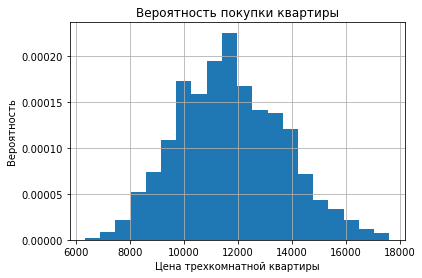

In [54]:
count, bins, ignored=plt.hist(room3, 20, density=True)
plt.title('Вероятность покупки квартиры')
plt.ylabel('Вероятность')
plt.xlabel('Цена трехкомнатной квартиры')
plt.grid(True)
plt.show()

Судя по гистограмме можно сделать предположение о нормальном распределении.